In [1]:
from yaml import safe_load
from core.data.unimers import UnimersData

data_hparams = safe_load(open("/remote/gpu04/hummerich/mol-fff/mol-fff/config/unimers_autoencoder.yaml"))[
    "data_hparams"
]
data = UnimersData(UnimersData.hparams_schema.from_dict(data_hparams))

/remote/gpu04/hummerich/mol-fff/.venv/lib/python3.11/site-packages/torch_geometric/data/dataset.py:240: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, pass `force_reload=True` explicitly to reload the dataset.
  warnings.warn(


In [5]:
import torch

import matplotlib.pyplot as plt

from core.models.cross_modality_ae import CrossModalityAE

In [6]:
model = CrossModalityAE.load_from_checkpoint(
    "/remote/gpu04/hummerich/mol-fff/mol-fff/lightning_logs/Unimers_Autoencoder_dim10_normedOut/2025-02-20_16-54-45/checkpoints/last.ckpt",
    map_location="cpu",
).eval()

In [23]:
batch = next(iter(data.test_loader)).to(model.device)

with torch.no_grad():
    h = model.encode(batch.x, batch.edge_index, batch.edge_attr)

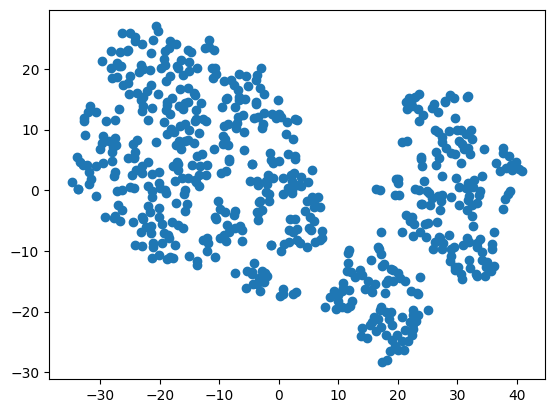

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
h_embedded = tsne.fit_transform(h.cpu().numpy())

plt.scatter(h_embedded[:, 0], h_embedded[:, 1])

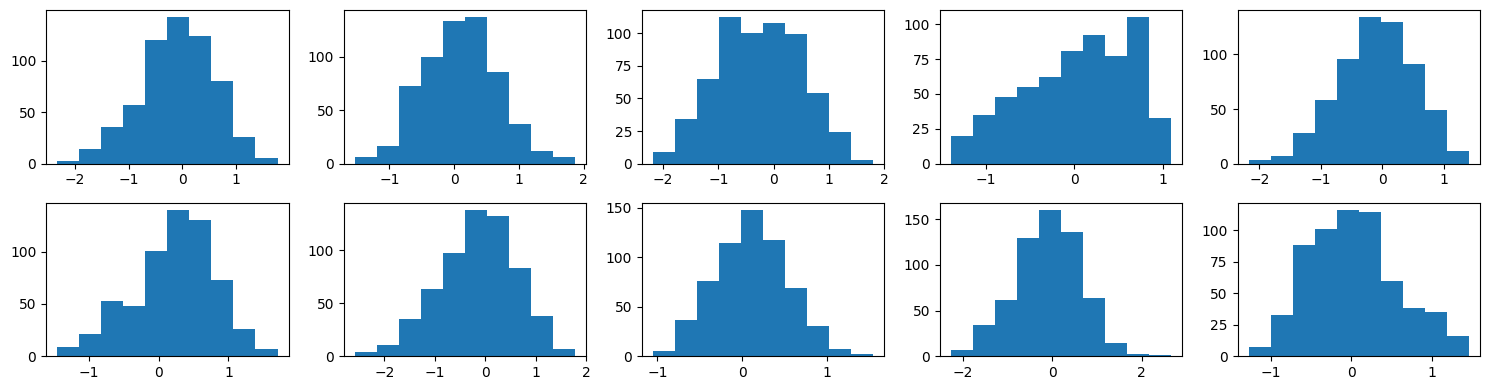

In [53]:
fig = plt.figure(figsize=(15, 4))

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.hist(h[..., i].cpu().numpy())
    plt.tight_layout()

In [54]:
x_hat, edge_attr_hat = model(batch.x, batch.edge_index, batch.edge_attr)